Import packages/libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Creating the dataset

In [29]:
features, targets = make_classification(n_samples = 60, n_features = 2, n_informative = 1, n_redundant = 0, n_clusters_per_class = 1, random_state = 1)

In [30]:
df = pd.DataFrame(data=features, columns=['x1', 'x2'])
df['targets'] = targets
df.head()

,x1,x2,targets
0,-1.552019,0.827975,0
1,0.718618,0.408901,1
2,-2.155107,1.519817,0
3,-1.382038,-1.396496,0
4,1.207666,0.423494,1


Visualize the dataset

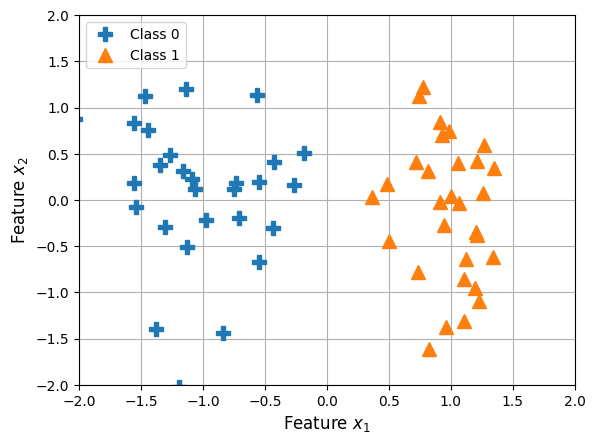

In [31]:
plt.plot(
    features[targets == 0, 0],
    features[targets == 0, 1],
    marker = 'P',
    markersize = 10,
    linestyle = '',
    label = 'Class 0'

)

plt.plot(
    features[targets == 1, 0],
    features[targets == 1, 1],
    marker = '^',
    markersize = 10,
    linestyle = '',
    label = 'Class 1'
)

plt.legend(loc = 2)

plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

Create the perceptron

In [32]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0:
            prediction = 1
        else:
            prediction = 0

        return prediction

    def update(self, x, y_true):
        prediction = self.forward(x)
        error = y_true - prediction

        # Updating the weights
        self.bias += error
        for i, _ in enumerate(self.weights):
            self.weights[i] += error * x[i]

        return error

Train the Model

In [33]:
def train(model, X_train, y_train, epochs):
    # Training Loop
    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(X_train, y_train):
            error = model.update(x, y)
            error_count += abs(error)

        print(f"Epoch {epoch + 1} errors {error_count}")

Create a perceptron

In [41]:
ppn = Perceptron(num_features = 2)
train(ppn, features, targets, epochs =6)

Epoch 1 errors 2
Epoch 2 errors 0
Epoch 3 errors 0
Epoch 4 errors 0
Epoch 5 errors 0
Epoch 6 errors 0


Evaluate the model

In [42]:
def compute_accuracy(model, features, targets):
    correct = 0.0

    for x, y in zip(features, targets):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(targets)

In [43]:
train_acc = compute_accuracy(ppn, features, targets)
print("Model Accuracy:", train_acc)

Model Accuracy: 1.0


Plot the Decision Boundry

In [44]:
def plot_boundary(model):

    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x1_max, x2_min, x2_max

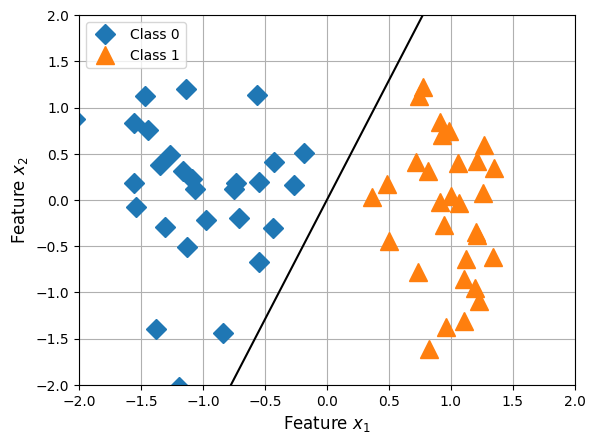

In [45]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)

plt.plot(
    features[targets == 0, 0],
    features[targets == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    features[targets == 1, 0],
    features[targets == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)

plt.xlim([-2, 2])
plt.ylim([-2, 2])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

Split the dataset and test accuracy computation


In [47]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

ppn = Perceptron(num_features=2)

epochs = 10
for epoch in range(epochs):
    for x, y in zip(X_train, y_train):
        ppn.update(x, y)

test_acc = compute_accuracy(ppn, X_test, y_test)
print("Test Accuracy:", test_acc)


Test Accuracy: 1.0
